In [63]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt


# get data file names
path =r'C:\Users\Anand\Documents\Sports_data_analysis'
filenames = glob.glob(path + "/*.csv")
dfs = []
i=2009
for filename in filenames:
    temp=pd.read_csv(filename)
    temp.insert(2, column = "Year", value = i)  
    i=i+1
    dfs.append(temp)

#to combine all the data frames into one 

big_frame = pd.concat(dfs, ignore_index=True)


Matplotlib is building the font cache; this may take a moment.


In [64]:
big_frame


POS             Player  Year  Mat  Inns  NO  Runs  HS    Avg   BF  \
0      1          JP Duminy  2009   13    12   3   372  62  41.33  325   
1      2   Sachin Tendulkar  2009   13    13   2   364  68  33.09  303   
2      3       Rohit Sharma  2009   16    16   3   362  52  27.84  315   
3      4  Sanath Jayasuriya  2009   12    12   0   221  52  18.41  192   
4      5     Abhishek Nayar  2009   13    11   2   193  35  21.44  152   
..   ...                ...   ...  ...   ...  ..   ...  ..    ...  ...   
188   14         Rohan Raje  2022    6     3   3     8  6*   0.00    9   
189   15       Ashish Nehra  2022   14     4   3     3  2*   3.00   13   
190   16   Vikrant Yeligati  2022    2     1   0     2   2   2.00    2   
191   17   Dilhara Fernando  2022    5     1   1     2  2*   0.00    1   
192   18    Dhawal Kulkarni  2022   10     1   1     2  2*   0.00   16   

         SR  100  50  4s  6s  
0    114.46    0   5  26  11  
1    120.13    0   2  39  10  
2    114.92    0   1  22  18  
3    115.10    0   2  23   7  
4    126.97    0   0  14   7  
..      ...  ...  ..  ..  ..  
188   88.88    0   0   1   0  
189   23.07    0   0   0   0  
190  100.00    0   0   0   0  
191  200.00    0   0   0   0  
192   12.50    0   0   0   0  

[193 rows x 15 columns]

In [65]:
player=big_frame[['Player', 'Year']]
player



Player  Year
0            JP Duminy  2009
1     Sachin Tendulkar  2009
2         Rohit Sharma  2009
3    Sanath Jayasuriya  2009
4       Abhishek Nayar  2009
..                 ...   ...
188         Rohan Raje  2022
189       Ashish Nehra  2022
190   Vikrant Yeligati  2022
191   Dilhara Fernando  2022
192    Dhawal Kulkarni  2022

[193 rows x 2 columns]

In [66]:
unique_player=np.unique(player['Player'])
unique_player

array(['Abhishek Nayar', 'Aditya Tare', 'Aiden Blizzard',
       'Akila Dananjaya', 'Ali Murtaza', 'Andrew Symonds',
       'Anmolpreet Singh', 'Ashish Nehra', 'Basil Thampi', 'Ben Cutting',
       'Ben Dunk', 'Chandan Madan', 'Chetanya Nanda',
       'Chidhambaram Gautam', 'Clint McKay', 'Corey Anderson',
       'Daniel Sams', 'Davy Jacobs', 'Dewald Brevis', 'Dhawal Kulkarni',
       'Dilhara Fernando', 'Dominic Thornely', 'Dwayne Smith',
       'Graham Napier', 'Harbhajan Singh', 'Herschelle Gibbs',
       'Ishan Kishan', 'JP Duminy', 'James Franklin', 'James Pattinson',
       'Jasprit Bumrah', 'Jaydev Unadkat', 'Jofra Archer',
       'Kieron Pollard', 'Lasith Malinga', 'Lendl Simmons', 'Luke Ronchi',
       'Marchant de Lange', 'Martin Guptill', 'Mayank Markande',
       'Michael Hussey', 'Mitchell Johnson', 'Mitchell McClenaghan',
       'Mohammad Ashraful', 'Murugan Ashwin', 'Musavir Khote',
       'Parthiv Patel', 'Pinal Shah', 'Pragyan Ojha', 'Praveen Kumar',
       'RP Singh',

In [67]:

name=[]
appearance=[]
players=[]

for plyer in unique_player:
    count=0
    for i in player['Player']:
        if plyer==i:
            count=count+1

    data= {'Player':plyer,'appearance':count}
    players.append(data)

df=pd.DataFrame(players)
df
# data=df.sort_values(by=['appearance'])
# data


Player  appearance
0     Abhishek Nayar           3
1        Aditya Tare           4
2     Aiden Blizzard           1
3    Akila Dananjaya           1
4        Ali Murtaza           1
..               ...         ...
69       Tymal Mills           1
70      Unmukt Chand           2
71  Vikrant Yeligati           1
72       Vinay Kumar           2
73       Zaheer Khan           3

[74 rows x 2 columns]

In [68]:

tmp=pd.merge(player,df,on='Player')
#changing datatype from int to string
tmp["Year"]=tmp.Year.astype("str")
tmp=tmp.groupby("Player").agg({  'Year': ', '.join, 'appearance':'first' })
tmp
sorting=tmp.reset_index()
sorting=sorting.sort_values(by='appearance', ascending=False)
data_of_most_matches_played=sorting[0:10:1]
data_of_most_matches_played=data_of_most_matches_played.reset_index()
data_of_most_matches_played


index            Player                                               Year  \
0     56      Rohit Sharma  2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...   
1     33    Kieron Pollard  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017...   
2     24   Harbhajan Singh  2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...   
3     34    Lasith Malinga     2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017   
4     64  Suryakumar Yadav     2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021   
5     60    Saurabh Tiwary                 2009, 2010, 2017, 2019, 2020, 2022   
6     19   Dhawal Kulkarni                 2009, 2011, 2012, 2019, 2020, 2022   
7     58  Sachin Tendulkar                 2009, 2010, 2011, 2012, 2013, 2022   
8     26      Ishan Kishan                 2016, 2017, 2018, 2019, 2020, 2021   
9     30    Jasprit Bumrah                 2014, 2016, 2017, 2018, 2019, 2020   

   appearance  
0          14  
1          12  
2          10  
3           8  
4           8  
5           6  
6           6  
7           6  
8           6  
9           6

In [ ]:
max_matches_played_player=tmp.sort_values(by='appearance',ascending=False)
max_matches_played_player.rename(columns={"Year":"Years"}, inplace=True)

max_matches_played_player= max_matches_played_player.reset_index()


<BarContainer object of 10 artists>

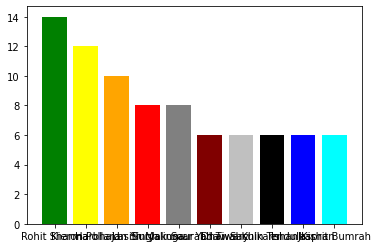

In [105]:
Players=data_of_most_matches_played['Player']
seasons_played=data_of_most_matches_played['appearance']
colors=['green','Yellow','Orange','Red','Gray','Maroon','Silver','Black','Blue','cyan']
plt.bar(Players,seasons_played, color=colors)


In [ ]:
big_frame=big_frame.sort_values(by="Runs", ascending=False).merge(max_matches_played_player )
big_frame


POS             Player  Year  Mat  Inns  NO  Runs    HS    Avg   BF  \
0      1   Sachin Tendulkar  2010   15    15   2   618   89*  47.53  466   
1      1   Sachin Tendulkar  2011   16    16   3   553  100*  42.53  488   
2      2   Sachin Tendulkar  2009   13    13   2   364    68  33.09  303   
3      2   Sachin Tendulkar  2012   13    13   2   324    74  29.45  283   
4      4   Sachin Tendulkar  2013   14    14   1   287    54  22.07  231   
..   ...                ...   ...  ...   ...  ..   ...   ...    ...  ...   
188   13  Mohammad Ashraful  2009    1     1   0     2     2   2.00   10   
189   12        Ali Murtaza  2011    5     1   1     2    2*   0.00    5   
190   13  Marchant de Lange  2014    1     1   0     1     1   1.00    2   
191   14      Praveen Kumar  2014    3     1   0     1     1   1.00    2   
192   15     Chetanya Nanda  2009    3     1   0     0    0*   0.00    1   

         SR  100  50  4s  6s                               Years  appearance  
0    132.61    0   5  86   3  2009, 2010, 2011, 2012, 2013, 2022           6  
1    113.31    1   2  67   5  2009, 2010, 2011, 2012, 2013, 2022           6  
2    120.13    0   2  39  10  2009, 2010, 2011, 2012, 2013, 2022           6  
3    114.48    0   2  39   4  2009, 2010, 2011, 2012, 2013, 2022           6  
4    124.24    0   1  38   5  2009, 2010, 2011, 2012, 2013, 2022           6  
..      ...  ...  ..  ..  ..                                 ...         ...  
188   20.00    0   0   0   0                                2009           1  
189   40.00    0   0   0   0                                2011           1  
190   50.00    0   0   0   0                                2014           1  
191   50.00    0   0   0   0                                2014           1  
192    0.00    0   0   0   0                                2009           1  

[193 rows x 17 columns]

In [ ]:
big_frame= big_frame.sort_values(by='appearance', ascending=False)
big_frame[0:70:1]

POS            Player  Year  Mat  Inns  NO  Runs   HS    Avg   BF  \
19     3      Rohit Sharma  2017   17    16   2   333   67  23.78  273   
18     3      Rohit Sharma  2009   16    16   3   362   52  27.84  315   
15     2      Rohit Sharma  2022   13    12   1   404  76*  36.72  273   
16     2      Rohit Sharma  2014   15    15   2   390  59*  30.00  302   
23     3      Rohit Sharma  2021    3     3   0    54   41  18.00   49   
..   ...               ...   ...  ...   ...  ..   ...  ...    ...  ...   
163   11   Dhawal Kulkarni  2009    8     4   2     9   7*   4.50   17   
167   18   Dhawal Kulkarni  2022   10     1   1     2   2*   0.00   16   
4      4  Sachin Tendulkar  2013   14    14   1   287   54  22.07  231   
2      2  Sachin Tendulkar  2009   13    13   2   364   68  33.09  303   
54     6    Saurabh Tiwary  2020    7     5   0   103   42  20.60   80   

         SR  100  50  4s  6s  \
19   121.97    0   3  31   9   
18   114.92    0   1  22  18   
15   147.98    0   4  38  19   
16   129.13    0   3  31  16   
23   110.20    0   0   4   3   
..      ...  ...  ..  ..  ..   
163   52.94    0   0   0   0   
167   12.50    0   0   0   0   
4    124.24    0   1  38   5   
2    120.13    0   2  39  10   
54   128.75    0   0   8   3   

                                                 Years  appearance  
19   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...          14  
18   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...          14  
15   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...          14  
16   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...          14  
23   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016...          14  
..                                                 ...         ...  
163                 2009, 2011, 2012, 2019, 2020, 2022           6  
167                 2009, 2011, 2012, 2019, 2020, 2022           6  
4                   2009, 2010, 2011, 2012, 2013, 2022           6  
2                   2009, 2010, 2011, 2012, 2013, 2022           6  
54                  2009, 2010, 2017, 2019, 2020, 2022           6  

[70 rows x 17 columns]